# Web Data Scraping

[Spring 2019 ITSS Mini-Course](https://www.colorado.edu/cartss/programs/interdisciplinary-training-social-sciences-itss/mini-course-web-data-scraping) — ARSC 5040  
[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

## Course description

This is a five-week one-credit "mini-course" on retrieving ("scraping") data from the web. The course is intended for researchers in the social sciences and humanities with computational instincts but limited or no prior programming experience. Each class will be 2.5 hours long: we'll take a break mid-way for biological input and output. Lectures will use a combination of lecture-by-notebook as well as hands-on exercises. The end of each class will have links to resources and additional take-home exercises. Students will have the option of presenting their solutions to the take-home exercises at the beginning of the next class.

Although many programming languages offer libraries for web information retrieval and analysis, we will be focusing on the Python data analysis ecosystem given its popularity and capabilities. I would strongly recommend that students download the latest Python 3.7 or above version of the [Anaconda distribution](https://www.anaconda.com/download/) which includes the Jupyter Notebook environment we're currently in, most of the data libraries we will use, and other conveniences.

## Learning objectives

Students will:
* Be able to navigate and access structured web data like HTML, XML, and JSON
* Develop strategies for identifying relevant structures in semi-structed data using browser console tools
* Utilize Python-based libraries to make request and parse web data
* Retrieve data from platforms' application programming interfaces (APIs)
* Critically reflect about the technological and ethical constraints on web scraping

## Class outline

* **Week 1**: Introduction to Jupyter, browser console, structured data, ethical considerations
* **Week 2**: Scraping HTML with `requests` and `BeautifulSoup`
* **Week 3**: Scraping web data with Selenium, other tools for automated scraping
* **Week 4**: Scraping an API with `requests` and `json`, Wikipedia
* **Week 5**: Authenticating through an API, Twitter & Reddit

## Evaluation

To be determined based on enrollments, distribution of skills, *etc*. but will primarily involve regular attendance, participation, and upwards trajectory in skill and confidence.

## Acknowledgements

This course will draw on resources built by myself and [Allison Morgan](https://allisonmorgan.github.io/) for the [2018 Summer Institute for Computational Social Science](https://github.com/allisonmorgan/sicss_boulder), which were in turn derived from [other resources](https://github.com/simonmunzert/web-scraping-with-r-extended-edition) developed by [Simon Munzert](http://simonmunzert.github.io/) and [Chris Bail](http://www.chrisbail.net/). 

Thank you also to Professors [Bhuvana Narasimhan](https://www.colorado.edu/linguistics/bhuvana-narasimhan) and [Stefanie Mollborn](https://behavioralscience.colorado.edu/person/stefanie-mollborn) for coordinating the ITSS seminars.

## Introduction to Jupyter Notebooks

Jupyter Notebooks (previously called IPython Notebooks) are interactive programming environments that are great for writing, executing, and documenting code. The notebooks we'll be using launch in your web browser but are "talking" to a local background kernel (hence the "localhost" in the URL) rather than an external server. Put another way: the data you're analyzing in Jupyter Notebook isn't leaving your computer.

Jupyter Notebooks are composed of "cells" which you can create, move, and delete. These cells can be different formats like "Markdown" (what this pretty cell is), "code" (what you'll spend most of your time in), or "raw" (useful for preserving code but avoiding accidentally running it). All the cells up until now have been [Markdown](https://daringfireball.net/projects/markdown/syntax), which is a lightweight standard for formatting text. You can double click on these Markdown cells to edit them.

This is an example of a code cell below. You type the code into the cell and run the cell with the "Run" button in the toolbar or pressing Shift+Enter.

In [2]:
name = 'Brian Keegan'
print(name)

Brian Keegan


Jupyter Notebooks are great because they can keep your code, documentation, and results all in one file. Here I'll import a helper library that lets Jupyter Notebook embed images from the web (from [this tweet](https://twitter.com/barackobama/status/831527113211645959), which we'll return to in a bit). When you save this notebook, this image will be saved with it.

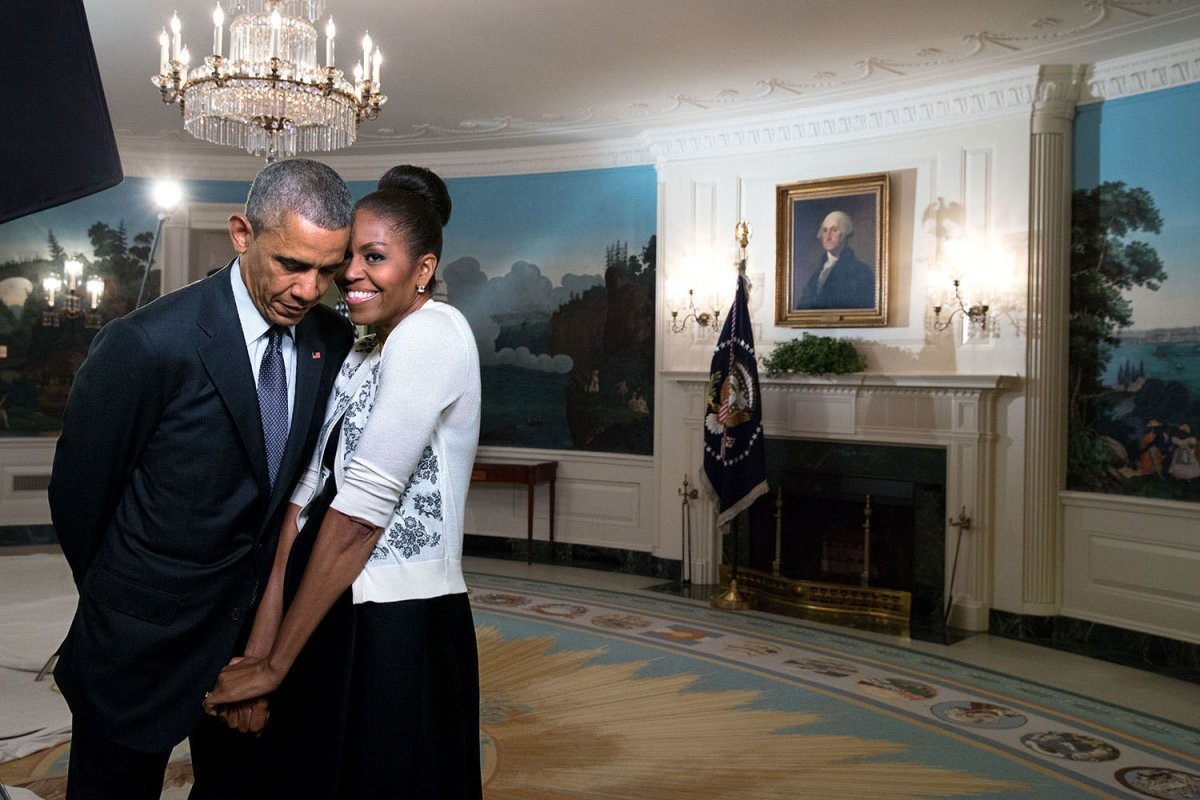

In [3]:
from IPython.display import Image

Image('https://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg')

### Exercises

1. Create at least two new cells below (before the **Additional resources** cell) and write your name and 1+1 in them.
2. Experiment with running a code cell versus a markdown cell. How does the cell change formatting for each?
3. Move cells around (look at the arrows in the toolbar or use the keyboard shortcuts under Help).
4. Create a third cell and add another image from the web (use the "Copy Image Address" on a right click) into the notebook using the `Image` function.

### Additional resources

Jupyter Notebooks are very powerful tools that are increasingly pervasive throughout the computer, information, and data science communities. I am an [unapologetic evangelist](https://github.com/brianckeegan/Bechdel/blob/master/Bechdel_test.ipynb) for them to be used by researchers, journalists, and activists to improve documentation practices and openness in data analysis, but notebooks also have their critics: [Joel Grus](https://twitter.com/joelgrus?lang=en)'s hilarious but important presentation, [I Don't Like Notebooks](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit). 

Here is some helpful documentation, tutorials, and examples; there are many others out there on the web!

* [DataCamp — The Definitive Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Jupyter Notebook documentation](https://jupyter.readthedocs.io/en/latest/)
* [Gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

## Using Chrome's "Inspect" tool

The official list of nominees and winners of the 90th Academy Awards (in 2018) is available on [the Academy of Motion Picture Arts and Sciences' website](https://www.oscars.org/oscars/ceremonies/2018). By ocular inspection, this data is at least semi-structured: there are groups of nominees, each group has a title, each nominee has the name of the movie. But this is not structured in the way that we typically analyze data, a table with rows (observations) and columns (features).

This exercise assumes you're using Chrome, if you're using Safari ([instructions](https://support.apple.com/guide/safari-developer/inspecting-overview-dev1a8227029/mac)) or Mozilla ([instructions](https://developer.mozilla.org/en-US/docs/Tools/View_source)), there are slightly different workflows. If you right click on the "Actor in a Leading Role" and select "Inspect", a new window should appear on the side of your browser window. Make sure you have the "Elements" tab clicked.

You should see a nested list of collapsable elements. This is a very complex webpage, like many are these days, with many layers of tags. However if you mouse over the elements, things highlight in the primary browser window. You can see how this is really useful for matching specific HTML codes with what they produce. You can expand an element to see its sub-elements, sub-sub-elements, and so on.

You should discover that the `<div class="view-grouping">` elements correspond to the nominee categories. The `"view-grouping"` is an attribute for the `div` tag. Expanding this element reveals a `<div class="view-grouping-content">` element, which then has seven "children": an `<h3>` (heading 3) tag for the name of the category, an obtuse `<div>` class for the winner, another `<h3>` tag for the nominees, and then four (or more) of the same obtuse `<div>` classes for the other nominees. 

<img src="https://github.com/CARTSS/Web-Data-Scraping-S2019/blob/master/Notebooks/Images/oscars-tags-1.png?raw=true"></img>

Expanding any one of the obtuse `<div>` elements reveals still more child tags that ultimately end with the name of the actor `<h4 class="field-content">Gary Oldman</h4>` and movie `<span class="field-content">Darkest Hour</span>`.

<img src="https://github.com/CARTSS/Web-Data-Scraping-S2019/blob/master/Notebooks/Images/oscars-tags-2.png?raw=true"></img>

We will use Chrome's "Inspect" tool throughout the rest of the course to find out where our data lives.

### Exercises

1. Use the inspect tool to find the HTML element that makes the triangular logo at the top of the page.
2. Use the inspect tool to find the `<li>` tags linking to other years's awards pages.
3. How does the HTML change under the `"social-drawer-content"` element when you click between Twitter, Instagram, *etc*.?

## Forms of structured data

There are three primary forms of structured data you will encounter on the web: HTML, XML, and JSON.

### HTML
The Oscars example from above is an example of [HyperText Markup Language](https://www.w3.org/html/) (HTML), a markup standard that allows web browsers to render documents transmitted by a web server into webpages. HTML is distinct from—but depends strongly on—the [HyperText Transfer Protocol](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol) (HTTP) to move data from servers to clients. HTML works with other standards like Cascading Style Sheets (CSS) and JavaScript to create the dynamic and interactive websites. 

HTML has a tree-like structure with the "root" node being an `<html>` element with other elements like `<body>`s and `<head>`s as children, and those children having other children live the `<div>`, `<a>`, and [other elements](https://en.wikipedia.org/wiki/HTML_element). See the visualization below for a simple example of an HTML tree.

<img src="https://raw.githubusercontent.com/compsocialscience/summer-institute/master/2018/materials/day2-digital-trace-data/screenscraping/rmarkdown/html_tree.png"></img>
<em>From Chris Bail's "Screen-Scraping in R": <a href="https://cbail.github.io/SICSS_Screenscraping_in_R.html">https://cbail.github.io/SICSS_Screenscraping_in_R.html</a></em>

It's beyond the scope of this mini-course to cover what all these elements do or how they interact—I'll leave it to you to develop some folk theories of these tags' functionality based on exploring pages with the "Inspect" tool above.

We can use Python's `requests` library to make a valid HTTP "get" request to the Oscars' web server for the 90 Academy Awards which will return the raw HTML. There are more than 144,000 characters in the document!

In [4]:
import requests

# Pretend to be a web browser and make a get request of a webpage
oscars90_request = requests.get('https://www.oscars.org/oscars/ceremonies/2018')

# The .text returns the text from the request
oscars90_html = oscars90_request.text

# The oscars90_html is a string, we can use the common len function to ask how long the string is (in characters)
len(oscars90_html)

144587

Let's look at the first thousand characters. Mostly declarations to handle Internet Explorer's notorious refusal to follow standards—stuff you don't need to worry about.

In [5]:
# The [0:1000] is a slicing notation 
# It gets the first (position 0 in Python) character until the 1000th character

print(oscars90_html[0:1000])

<!DOCTYPE html>
  <!--[if IEMobile 7]><html class="no-js ie iem7" lang="en" dir="ltr"><![endif]-->
  <!--[if lte IE 6]><html class="no-js ie lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]-->
  <!--[if (IE 7)&(!IEMobile)]><html class="no-js ie lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]-->
  <!--[if IE 8]><html class="no-js ie lt-ie9" lang="en" dir="ltr"><![endif]-->
  <!--[if (gte IE 9)|(gt IEMobile 7)]><html class="no-js ie" lang="en" dir="ltr" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#"><![endif]-->
  <!--[if !IE]><!--><html class="no-js" lang="en" dir="ltr" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#"><!--<![endif]-->
<head>
  <meta charset="utf-8" /><script type="text/javascript

Looking at 1,000 lines about a third of the way through the document, we can see some of the structure we found with the "Inspect" tool above corresponding to the closing lines of the "Actor in a Supporting Role" grouping and the opening lines of the "Acress in a Leading Role" grouping.

In [6]:
# You can slice any ranges you'd like up, as long as it's not beyond the length of the string
# oscars90_html[144588:] would return an error

print(oscars90_html[50000:51000])

        <span class="field-content"></span>  </div>  </div>
  <div class="views-row views-row-4 views-row-even views-row-last">
      
  <div class="views-field views-field-field-actor-name">        <h4 class="field-content">Christopher Plummer</h4>  </div>  
  <div class="views-field views-field-title">        <span class="field-content">All the Money in the World
</span>  </div>  
  <div class="views-field views-field-edit-node">        <span class="field-content"></span>  </div>  </div>
</div></div><div class="view-grouping"><div class="view-grouping-header"><h2>Actress in a Leading Role</h2></div><div class="view-grouping-content">  <h3><span class="golden-text">Winner</span></h3>
  <div class="views-row views-row-1 views-row-odd views-row-first views-row-last">
      
  <div class="views-field views-field-field-actor-name">        <h4 class="field-content">Frances McDormand</h4>  </div>  
  <div class="views-field views-field-title">        <span class="field-content">Three Billbo

We're not actually going to be slicing the text to get this structured data out, we'll use a wonderful tool call [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) to do the heavy lifting for us.

### XML

The HTML from the example above is too obtuse to start working with BeautifulSoup. The [Extensible Markup Language](https://www.w3.org/XML/) (XML) is a related markup language for representing data structures. XML was all the rage at the turn of the century: "many software designers can barely contain their excitement over its potential to establish a real Internet lingua franca" (*The New York Times* in 2000: "[The Next Big Step? It's Called XML](https://www.nytimes.com/2000/06/07/business/the-next-big-leap-it-s-called-xml.html)"). That obviously did not come to pass. But XML remains a robust and open—though verbose—standard for representing structured data.

XML has taken on something of an afterlife as the official data standard for the U.S. Congress. The [House](http://clerk.house.gov/index.aspx) and [Senate](https://www.senate.gov/general/XML.htm) both release information about members, committees, schedules, legislation, and votes in XML. These are immaculately formatted and documented and remarkably up-to-date: the data for members of the 116th Congress are already posted.

Use the `requests` library to make a HTTP get request to the House's webserver and get the list of current member data.

In [7]:
house_raw = requests.get('http://clerk.house.gov/xml/lists/MemberData.xml').text

senate_raw = requests.get('https://www.senate.gov/legislative/LIS_MEMBER/cvc_member_data.xml').text

This data is still in a string format (`type(house_raw)`), so it's difficult to search and navigate. Let's make our first soup together using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

In [8]:
# First import the library
from bs4 import BeautifulSoup

# Then make the soup, specifying the "lxml" parser
house_soup = BeautifulSoup(house_raw,'lxml')

What's so great about this soup-ified string? We now have a suite of new functions and methods that let us navigate the tree. First, let's inspect the different tags/elements in this tree of House member data. This is the full tree of data.

In [9]:
# Make an empty list to store data
children = []

# Start a loop to go through all the children tags in house_soup
for tag in house_soup.findChildren():
    
    # If the name of the tag (tag.name) is not already in the children list
    if tag.name not in children:
        
        # Add the name of the tag to the children list
        children.append(tag.name)

# Look at the list members
children

['html',
 'body',
 'memberdata',
 'title-info',
 'congress-num',
 'congress-text',
 'session',
 'majority',
 'minority',
 'clerk',
 'weburl',
 'members',
 'member',
 'statedistrict',
 'member-info',
 'namelist',
 'bioguideid',
 'lastname',
 'firstname',
 'middlename',
 'sort-name',
 'suffix',
 'courtesy',
 'prior-congress',
 'official-name',
 'formal-name',
 'party',
 'caucus',
 'state',
 'state-fullname',
 'district',
 'townname',
 'office-building',
 'office-room',
 'office-zip',
 'office-zip-suffix',
 'phone',
 'elected-date',
 'sworn-date',
 'committee-assignments',
 'committee',
 'footnote-ref',
 'footnote',
 'committees',
 'committee-fullname',
 'ratio',
 'subcommittee',
 'subcommittee-fullname']

We can navigate through the tree. You won't do this in practice, but it's helpful for debugging. In this case, we navigated from the root node (`html`) into the `body` tag, then the `memberdata` tag, then the `members` tag. There are 441 descendents at this level, corresponding to the 435 voting seats and the 6 seats for territories.

In [10]:
len(house_soup.html.body.memberdata.members)

441

You can also short-cut to the members tag directly rather than navigating down the parent elements.

In [11]:
len(house_soup.members)

441

The `.contents` method is great for getting a list of the children below the tag as a list. We can use the `[0]` slice to get the first member and their data in the list. Interestingly, the `<committee-assignments>` tags are currently empty since these have not yet been allocated, but will in the next few weeks.

In [12]:
house_soup.members.contents[0]

<member><statedistrict>AK00</statedistrict><member-info><namelist>Young, Don</namelist><bioguideid>Y000033</bioguideid><lastname>Young</lastname><firstname>Don</firstname><middlename></middlename><sort-name>YOUNG,DON</sort-name><suffix></suffix><courtesy>Mr.</courtesy><prior-congress>115</prior-congress><official-name>Don Young</official-name><formal-name>Mr. Young</formal-name><party>R</party><caucus>R</caucus><state postal-code="AK"><state-fullname>Alaska</state-fullname></state><district>At Large</district><townname>Fort Yukon</townname><office-building>RHOB</office-building><office-room>2314</office-room><office-zip>20515</office-zip><office-zip-suffix>0200</office-zip-suffix><phone>(202) 225-5765</phone><elected-date date="20181106">November  6, 2018</elected-date><sworn-date date="20190103">January  3, 2019</sworn-date></member-info><committee-assignments><committee rank=""></committee></committee-assignments></member>

You could keep navigating down the tree from here.

In [13]:
house_soup.members.contents[0].bioguideid

<bioguideid>Y000033</bioguideid>

Note that this navigation method breaks when the tag has a hyphen in it.

In [14]:
house_soup.members.contents[0].state-fullname

NameError: name 'fullname' is not defined

Instead you can use the `.find()` method to handle these hyphenated cases.

In [15]:
house_soup.members.contents[0].find('state-fullname')

<state-fullname>Alaska</state-fullname>

We can access the text inside the tag with `.text`

In [16]:
house_soup.members.contents[0].find('state-fullname').text

'Alaska'

The `.find_all()` method will be your primary tool when working with structured data. The `<party>` tag codes party membership (D=Democratic, R=Republican) for each representative. 

In [17]:
house_soup.find_all('party')[:10]

[<party>R</party>,
 <party>R</party>,
 <party>R</party>,
 <party>R</party>,
 <party>R</party>,
 <party>R</party>,
 <party>R</party>,
 <party>D</party>,
 <party>R</party>,
 <party>R</party>]

There [should be](https://en.wikipedia.org/wiki/116th_United_States_Congress#Party_summary) 235 Democrats and 199 Republicans, plus the other non-voting members from territories.

In [18]:
# Initialize a counter
democrats = 0
republicans = 0
other = 0

# Loop through each element of the caucus tags
for p in house_soup.find_all('party'):
    
    # Check if it's D, R, or something else
    if p.text == "D":
        
        # Increment the appropriate counter
        democrats += 1
    
    elif p.text == "R":
        republicans += 1
    else:
        other += 1
        
print("There are {0} Democrats, {1} Republicans, and {2} others in the 116th Congress.".format(democrats,republicans,other))


There are 239 Democrats, 201 Republicans, and 1 others in the 116th Congress.


### Exercises

1. How many members serve in "At Large" districts? (There's at least two ways to do this)
2. How many members are women?
3. How many members are not incumbents? (They were not in the prior Congress)

### JSON

HTML in the wild can be incredibly complicated (which is why we'll dedicate two whole class sessions to it) and XML is verbose and has other ideosyncracies (which is probably why we won't see it after this class). [JavaScript Object Notation](https://www.json.org/) (JSON) is probably the most popular data markup language and is especially ubiquitous when retreiving data from the application programming interfaces (APIs) of popular platforms like Twitter, Reddit, Wikipedia, *etc*.

JSON is attractive for programmers using JavaScript and Python because it can represent a mix of different data types. We need to make a brief digression into Python's fundamental data stuctures in order to understand the contemporary attraction to JSON. Python has a few fundamental data types for representing collections of information:

* **Lists**: This is a basic ordered data structure that can contain strings, ints, and floats.
* **Dictionaries**: This is an unordered data structure containing key-value pairs, like a phonebook.

Here are some basic examples of lists. Note that lists can contain other lists, and lists of lists of lists, and so on. In this case `school_district` is a list of schools, where each school is a list of classrooms, where each classroom is a list of names.

In [19]:
# Make classrooms as lists with student names as strings
classroom0 = ['Alice','Bob','Carol','Dave']
classroom1 = ['Eve','Frank','Grace','Harold']
classroom2 = ['Isabel','Jack','Katy','Lloyd']
classroom3 = ['Maria','Nate','Olivia','Philip']
classroom4 = ['Quinn','Rachel','Steve','Terry','Ursula']
classroom5 = ['Violet','Walter','Xavier','Yves','Zoe']

# Make schools that contain classrooms
school0 = [classroom0,classroom1]
school1 = [classroom2,classroom3]
school2 = [classroom4,classroom5]

# Make a school district that contains schools
school_district = [school0,school1,school2]

# Inspect one school's enrollments
school_district

[[['Alice', 'Bob', 'Carol', 'Dave'], ['Eve', 'Frank', 'Grace', 'Harold']],
 [['Isabel', 'Jack', 'Katy', 'Lloyd'], ['Maria', 'Nate', 'Olivia', 'Philip']],
 [['Quinn', 'Rachel', 'Steve', 'Terry', 'Ursula'],
  ['Violet', 'Walter', 'Xavier', 'Yves', 'Zoe']]]

You can access list elements by their position. In this case, we could access the first name in `classroom0` by requesting the item at the 0th index.

In [20]:
classroom0[0]

'Alice'

Here are some basic examples of dictionaries. Note that dictionaries can contain other dictionaries, and so on. In this example `mountain_west` is a dictionary of dictionaries where the outer dictionary is keyed by the name of the state and the inner dictionary has different statistical information.

In [21]:
# Make a dictionary of states containing dictionaries
mountain_west = {'Colorado': {'Abbreviation': 'CO',
                              'Area': 269601,
                              'Capital': 'Denver',
                              'Established': '1876-08-01',
                              'Largest city': 'Denver',
                              'Population': 5540545,
                              'Representatives': 7},
                 'Idaho': {'Abbreviation': 'ID',
                              'Area': 216443,
                              'Capital': 'Boise',
                              'Established': '1890-07-03',
                              'Largest city': 'Boise',
                              'Population': 1683140,
                              'Representatives': 2},
                 'Montana': {'Abbreviation': 'MT',
                              'Area': 380831,
                              'Capital': 'Helena',
                              'Established': '1889-11-08',
                              'Largest city': 'Billings',
                              'Population': 1042520,
                              'Representatives': 1},
                 'Utah': {'Abbreviation': 'UT',
                              'Area': 219882,
                              'Capital': 'Salt Lake City',
                              'Established': '1896-01-04',
                              'Largest city': 'Salt Lake City',
                              'Population': 3051217,
                              'Representatives': 4},
                 'Wyoming': {'Abbreviation': 'WY',
                              'Area': 253335,
                              'Capital': 'Cheyenne',
                              'Established': '1890-07-10',
                              'Largest city': 'Cheyenne',
                              'Population': 585501,
                              'Representatives': 1}}

What are the keys and what are the values?

In [22]:
mountain_west.keys()

dict_keys(['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'])

In [23]:
mountain_west.values()

dict_values([{'Abbreviation': 'CO', 'Area': 269601, 'Capital': 'Denver', 'Established': '1876-08-01', 'Largest city': 'Denver', 'Population': 5540545, 'Representatives': 7}, {'Abbreviation': 'ID', 'Area': 216443, 'Capital': 'Boise', 'Established': '1890-07-03', 'Largest city': 'Boise', 'Population': 1683140, 'Representatives': 2}, {'Abbreviation': 'MT', 'Area': 380831, 'Capital': 'Helena', 'Established': '1889-11-08', 'Largest city': 'Billings', 'Population': 1042520, 'Representatives': 1}, {'Abbreviation': 'UT', 'Area': 219882, 'Capital': 'Salt Lake City', 'Established': '1896-01-04', 'Largest city': 'Salt Lake City', 'Population': 3051217, 'Representatives': 4}, {'Abbreviation': 'WY', 'Area': 253335, 'Capital': 'Cheyenne', 'Established': '1890-07-10', 'Largest city': 'Cheyenne', 'Population': 585501, 'Representatives': 1}])

You access dictionary values by their keys.

In [24]:
# Statistics about Colorado
mountain_west['Colorado']

{'Abbreviation': 'CO',
 'Area': 269601,
 'Capital': 'Denver',
 'Established': '1876-08-01',
 'Largest city': 'Denver',
 'Population': 5540545,
 'Representatives': 7}

What is the population of Colorado? In a dictionary of dictionaries, you can access the inner dictionary with another key.

In [25]:
mountain_west['Colorado']['Population']

5540545

Nested data structures do not need to be the same type. A dictionary can have a list as a value for example. This would probably make the `school_district` example easier to understand.

In [26]:
school_district_dict = {'School 1':{'Classroom A':['Alice','Bob','Carol','Dave'],
                                    'Classroom B':['Eve','Frank','Grace','Harold']
                                   },
                        'School 2':{'Classroom A':['Isabel','Jack','Katy','Lloyd'],
                                    'Classroom B':['Maria','Nate','Olivia','Philip']
                                   },
                        'School 3':{'Classroom A':['Quinn','Rachel','Steve','Terry','Ursula'],
                                    'Classroom B':['Violet','Walter','Xavier','Yves','Zoe']
                                   }
                        }

We can access the 3rd member (remember Python indexes start at 0, so we ask for 2) of "Classroom B" in "School 2" by working our way outside inward.

In [27]:
school_district_dict['School 2']['Classroom B'][2]

'Olivia'

A list can take just about any other data structure as a value. Dictionaries are great because they label your data for you but don't preserve order and need unique keys, so they're bad at storing repeated data like a time series. Here's a list where the values are dictionaries and each dictionary is information about the population, state, and year of a location.

In [28]:
state_population = [ {'Population': 4338785, 'State': 'Colorado', 'Year': 2000},
                     {'Population': 4444513, 'State': 'Colorado', 'Year': 2001},
                     {'Population': 4504709, 'State': 'Colorado', 'Year': 2002},
                     {'Population': 4555084, 'State': 'Colorado', 'Year': 2003},
                     {'Population': 4608811, 'State': 'Colorado', 'Year': 2004},
                     {'Population': 4662534, 'State': 'Colorado', 'Year': 2005},
                     {'Population': 4745660, 'State': 'Colorado', 'Year': 2006},
                     {'Population': 4821784, 'State': 'Colorado', 'Year': 2007},
                     {'Population': 4901938, 'State': 'Colorado', 'Year': 2008},
                     {'Population': 4976853, 'State': 'Colorado', 'Year': 2009},
                     {'Population': 5049935, 'State': 'Colorado', 'Year': 2010},
                     {'Population': 5119538, 'State': 'Colorado', 'Year': 2011},
                     {'Population': 5191086, 'State': 'Colorado', 'Year': 2012},
                     {'Population': 5268413, 'State': 'Colorado', 'Year': 2013},
                     {'Population': 5350118, 'State': 'Colorado', 'Year': 2014},
                     {'Population': 5448055, 'State': 'Colorado', 'Year': 2015},
                     {'Population': 5538180, 'State': 'Colorado', 'Year': 2016}
                   ]

What's the population of Colorado in 2008?

It's actually a small pain to get it out in this list of dictionaries format. You could loop through each dictionary in the list and ask if its "Year" in 2008 and only then print out its "Population". You could discover the min and max years (assuming the data is reliably chronological) and then calculate the index where 2008 should occur. This format probably starts to remind you of some of the limitations of XML, but it has strengths in some situations.

In [29]:
# Loop through each dictionary in the list
for year_data in state_population:
    
    # If the inner dictionary's value for "Year" is 2008, do something, otherwise skip
    if year_data['Year'] == 2008:
        
        # Print our the inner dictionary's value for "Population"
        print(year_data['Population'])

4901938


In [30]:
# Year 2000 is at index 0, so year 2008 should be at index 8
# Passing only the index 8 returns a dictionary
# Include the key whose value you want from this dictionary: "Population"
state_population[8]['Population']

4901938

### Exercises

Below is an example of a [tweet status](https://dev.twitter.com/overview/api/tweets) object that Twitter's [API returns](https://dev.twitter.com/rest/reference/get/statuses/show/id). This `obama_tweet` dictionary corresponds to [this tweet](https://twitter.com/BarackObama/status/831527113211645959). This is a classic example of a JSON object containing a mixture of dictionaries, lists, lists of dictionaries, dictionaries of lists, *etc*.

In [31]:
obama_tweet = {'created_at': 'Tue Feb 14 15:34:47 +0000 2017',
               'favorite_count': 1023379,
               'hashtags': [],
               'id': 831527113211645959,
               'id_str': '831527113211645959',
               'lang': 'en',
               'media': [{'display_url': 'pic.twitter.com/O0UhJWoqGN',
                          'expanded_url': 'https://twitter.com/BarackObama/status/831527113211645959/photo/1',
                          'id': 831526916398149634,
                          'media_url': 'http://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg',
                          'media_url_https': 'https://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg',
                          'sizes': {'large': {'h': 800, 'resize': 'fit', 'w': 1200},
                                    'medium': {'h': 800, 'resize': 'fit', 'w': 1200},
                                    'small': {'h': 453, 'resize': 'fit', 'w': 680},
                                    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
                          'type': 'photo',
                          'url': 'https://t.co/O0UhJWoqGN'}],
               'retweet_count': 252266,
               'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
               'text': 'Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new. https://t.co/O0UhJWoqGN',
               'urls': [],
               'user': {'created_at': 'Mon Mar 05 22:08:25 +0000 2007',
                        'description': 'Dad, husband, President, citizen.',
                        'favourites_count': 10,
                        'followers_count': 84814791,
                        'following': True,
                        'friends_count': 631357,
                        'id': 813286,
                        'lang': 'en',
                        'listed_count': 221906,
                        'location': 'Washington, DC',
                        'name': 'Barack Obama',
                        'profile_background_color': '77B0DC',
                        'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/451819093436268544/kLbRvwBg.png',
                        'profile_banner_url': 'https://pbs.twimg.com/profile_banners/813286/1484945688',
                        'profile_image_url': 'http://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX_normal.jpg',
                        'profile_link_color': '2574AD',
                        'profile_sidebar_fill_color': 'C2E0F6',
                        'profile_text_color': '333333',
                        'screen_name': 'BarackObama',
                        'statuses_count': 15436,
                        'time_zone': 'Eastern Time (US & Canada)',
                        'url': 'https://t.co/93Y27HEnnX',
                        'utc_offset': -18000,
                        'verified': True},
               'user_mentions': [{'id': 409486555,
                                  'name': 'Michelle Obama',
                                  'screen_name': 'MichelleObama'}]}

1. What are the top-most keys in the `obama_tweet` object?
2. When was this tweet sent?
3. Does this tweet mention anyone?
4. How many retweets did this tweet receive (at the time I collected it)?
5. How many followers does the "user" who wrote this tweet have?
6. What's the "media_url" for the image in this tweet?

## Ethical considerations

The phrase "data scraping" is colloquial and popular but has pejorative connotations. Data is valuable: other people invested time in collecting, organizing, and sharing it. When you show up with a scraper you built after maybe a dozen hours demanding data, you rarely pay the costs of labor, hosting, *etc*. that went into making the data available. There are *very* good rationales for making many kinds of data more availabile: reproducibility of scientific results, sharing publicly-funded and/or close-to-zero marginal cost resources, transparency and accountability in democratic institutions, remixing for innovative new analyses, *etc*. 

But data breaches have become eponymous (Target in 2013, Equifax in 2017, Facebook in 2018, *etc*.) because they violate other values like privacy. Ethics is concerned with managing these conflicting values and in the West, we've largely converged around two frameworks: utilitarianism and deonotologicalism.

| *Type* | *Pros* | *Cons* |
| :--- | :----: | :----: |
| **Consequence** (utilitarian) | "Greatest good for greatest number" | Concerns of justice for minority |
| **Duty** (deontological) | Respect for all persons | Does not maximize utility/happiness |
| **Contract** (rights) | Consenual morality | Overly permissive/asymmetrical morality |
| **Character** (virtue) | Moral developmen and education | Assumes homogenous morality |

These manifest most clearly in principles outlined in the 1978 [Belmont Report](https://en.wikipedia.org/wiki/Belmont_Report):
* **Respect for persons**: protecting the autonomy of all people and treating them with courtesy and respect and allowing for informed consent. Researchers must be truthful and conduct no deception;
* **Beneficence**: The philosophy of "Do no harm" while maximizing benefits for the research project and minimizing risks to the research subjects; and
* **Justice**: ensuring reasonable, non-exploitative, and well-considered procedures are administered fairly — the fair distribution of costs and benefits to potential research participants — and equally.

(A fourth principle "Respect for Public" emphasizes compliance, accountability, and transparency in the conduct of research.)

In the context of data scraping, there are four "areas of difficulty":

* **Informed consent**: does the data scraper obtain consent from every person whose data is being retrieved?
* **Informational risk**: can the data scraper inflict economic, social, *etc*. harm on individuals by disclosing data?
* **Privacy**: does the data scraper know which information a person intended to be private or public? 
* **Decision-making under uncertainty**: does the data scraper know all the ways the data could be (mis)used? 

Ethical and legal risks involved with scraping:

* **[Copyright infringement](https://en.wikipedia.org/wiki/Copyright_infringement)**: compiling data that someone else can claim ownership over
* **[Trespass](https://en.wikipedia.org/wiki/Trespass_to_chattels#In_the_electronic_age)**: over-aggressive scraping shuts down someone else's property
* **[Computer Fraud & Abuse Act](https://en.wikipedia.org/wiki/Computer_Fraud_and_Abuse_Act)**: misrepresenting yourself to access a system is "hacking"

While I cannot provide legal advice, we will revisit these concerns throughout the course through best practices for avoiding infringement, staggering data collection, simulating human requests, securing data, and protecting privacy.